# Plotting and visualization in Pandas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Line plots

Series and DataFrame each have a plot() method for making many different plot types. By default, they make line plots:

<Axes: >

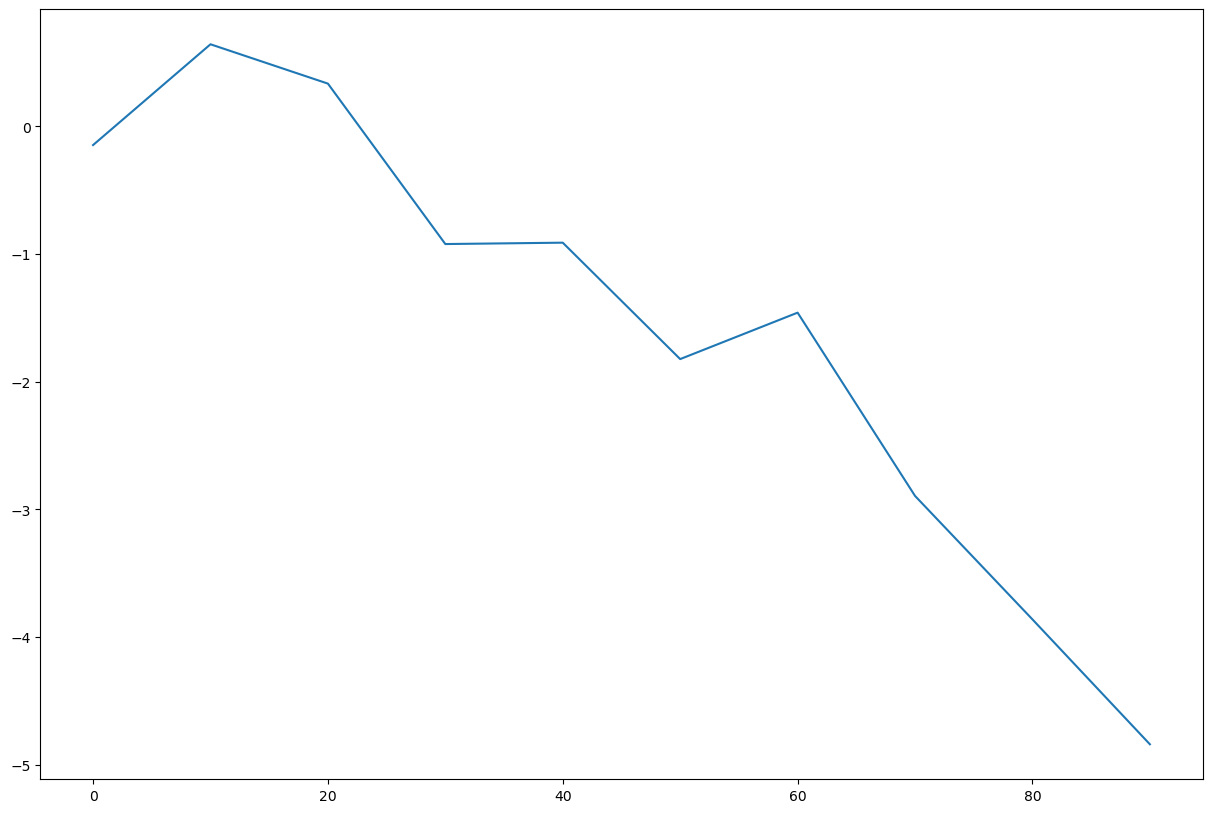

In [2]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot( figsize=(15,10) )

plot() draws the Series values, using the index for the X axis and the data for the Y axis. Ticks and axis limits can be adjusted through the $xticks$/$yticks$ and $xlim$/$ylim$ parameters.

Pandas plotting methods accept an $ax$ parameter to provide a specific Matplotlib object for the plot, thus allowing flexible positioning of the Pandas plots.

DataFrame.plot() represents, by default, each column as a different line on the same plot, and adds a legend automatically:

<Axes: >

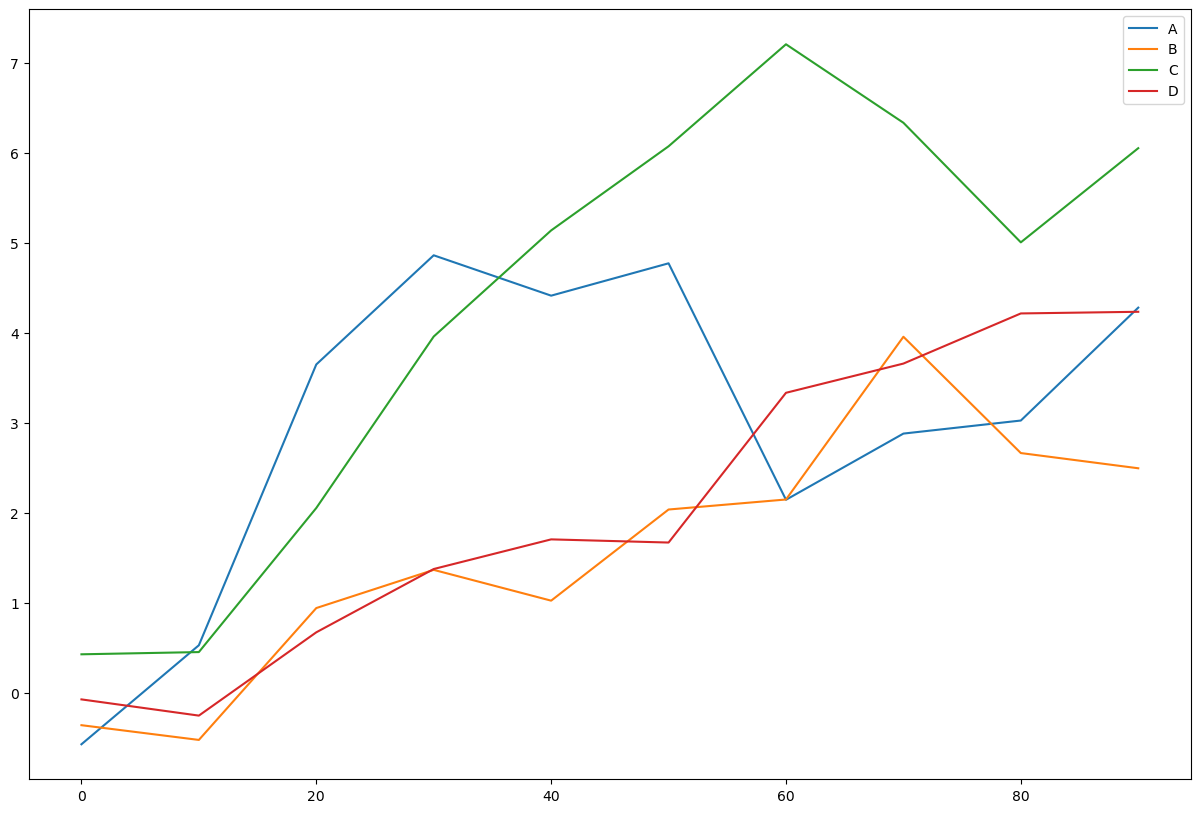

In [3]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot( figsize=(15,10) )

## Bar charts

Generating a bar chart is as simple as using $kind=bar$ or $kind=barh$ with the plot() call:

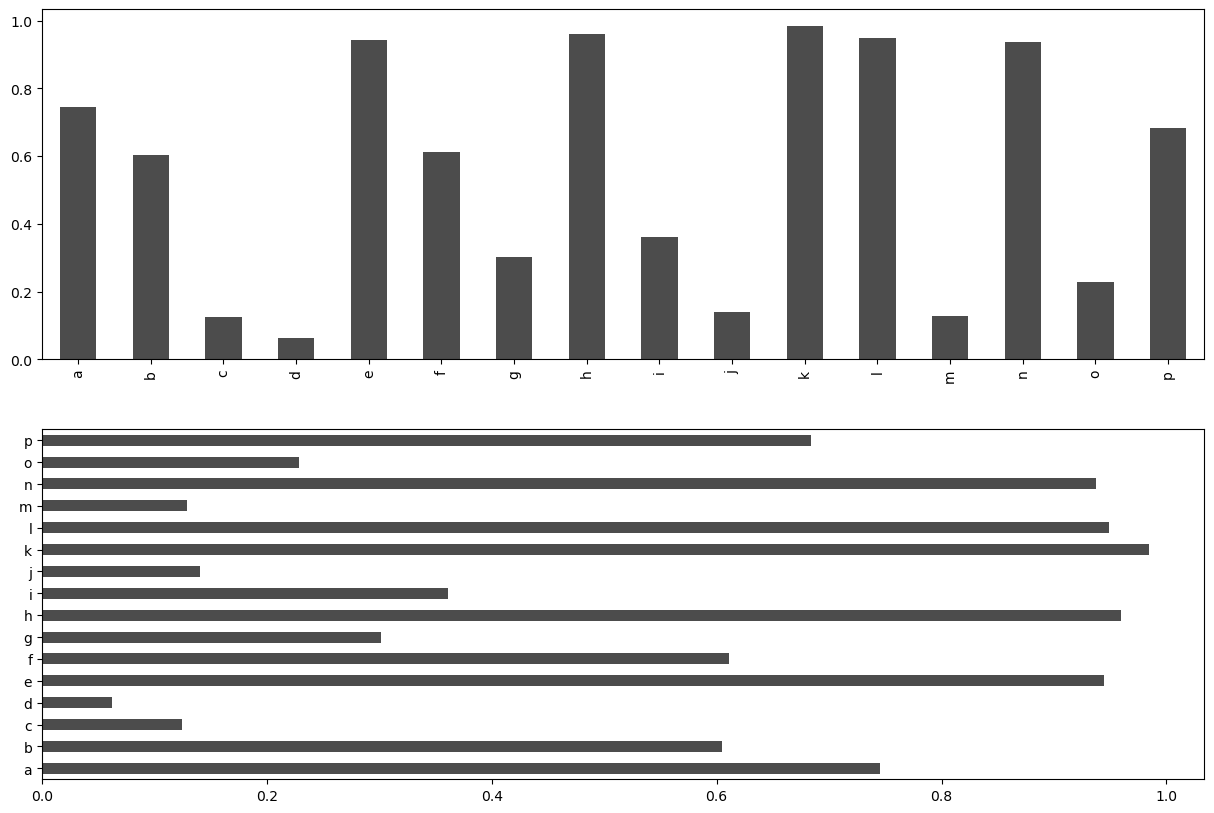

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(15,10) )
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7 )
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7 )
plt.setp( axes[0].get_xticklabels(), visible=True ); # Necesario, por algún motivo en esta versión de Pandas se ocultan los xtick_labels por defecto al pasar ax=

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value:

<Axes: >

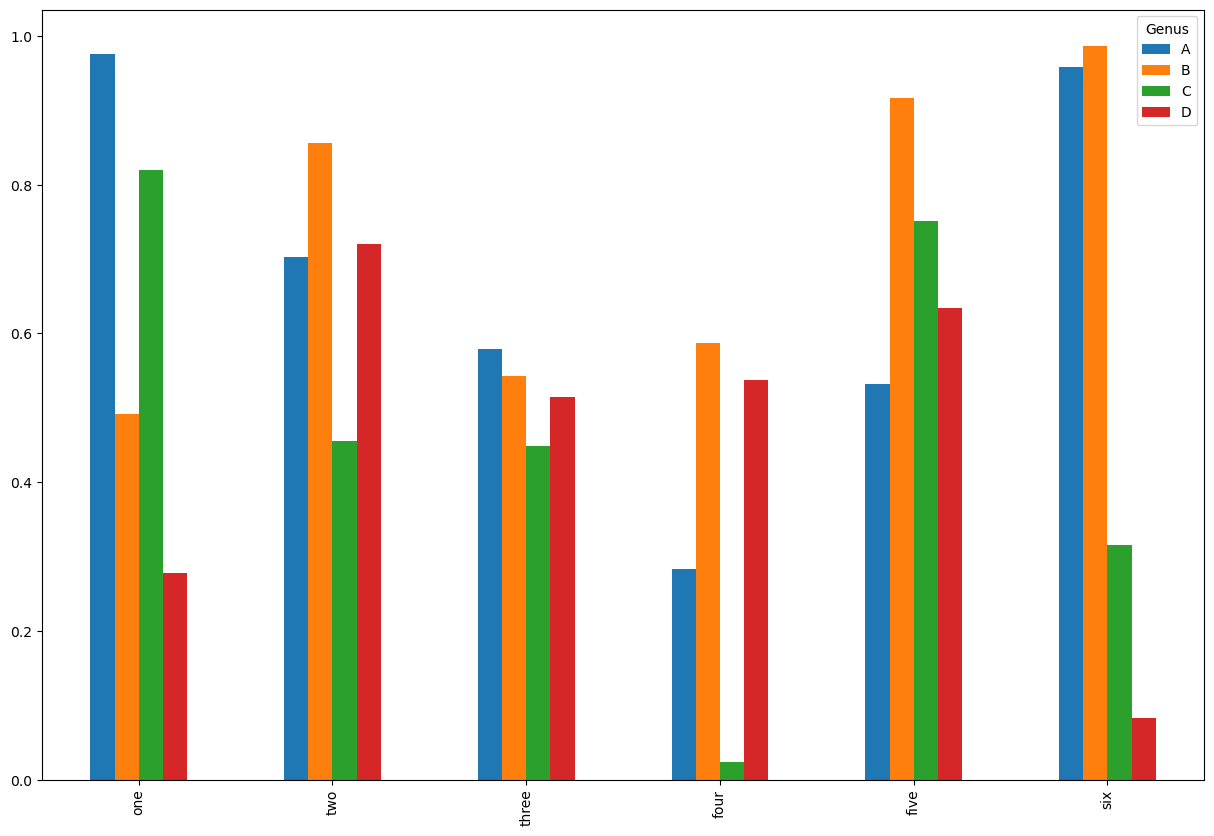

In [5]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar', figsize=(15,10) )

Alternatively, we can stack the bars:

<Axes: >

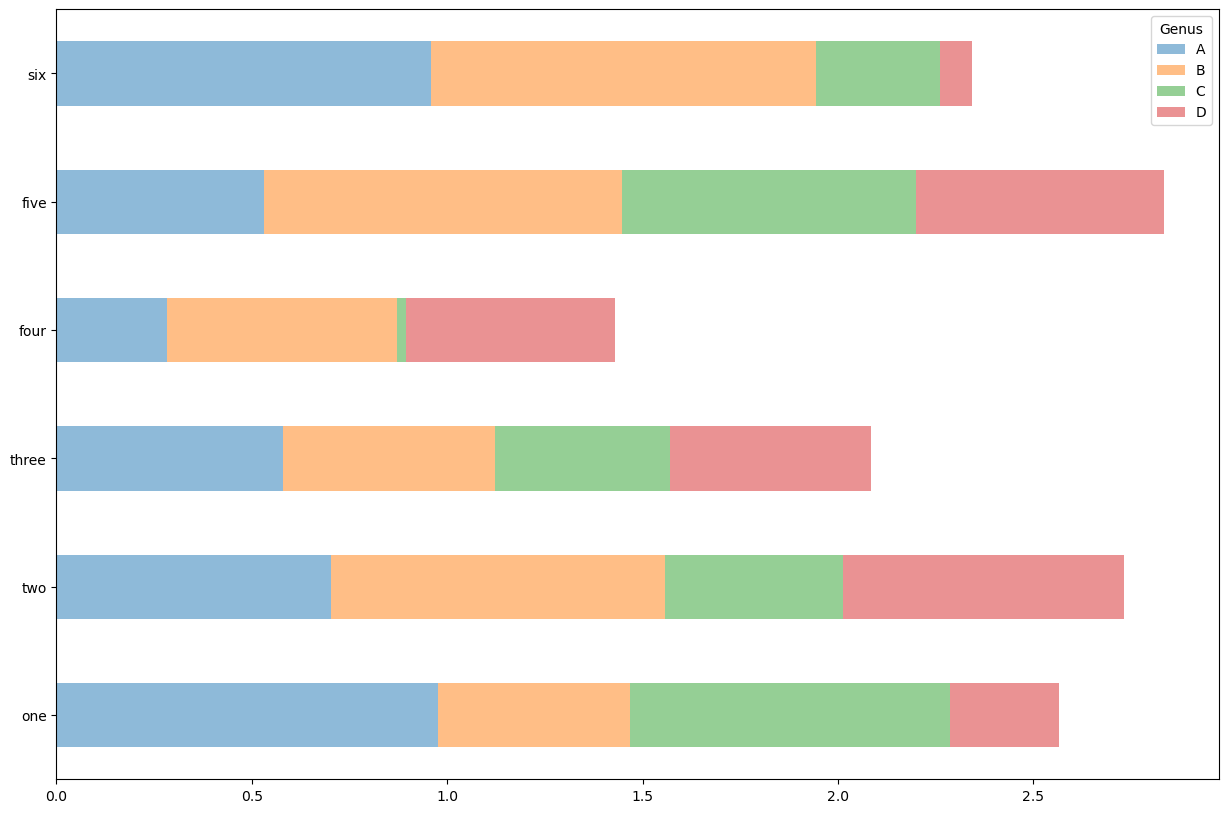

In [6]:
df.plot(kind='barh', stacked=True, alpha=0.5, figsize=(15,10))

## Histograms and density plots

Let us consider a bimodal distribution aggregating two different normal distributions:

In [7]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))

One way of plotting a histogram is to pass $kind="hist$ to plot(). A useful parameter in this case is $bins$, which indicates the number of categories in which to group data for the histogram:

<Axes: ylabel='Frequency'>

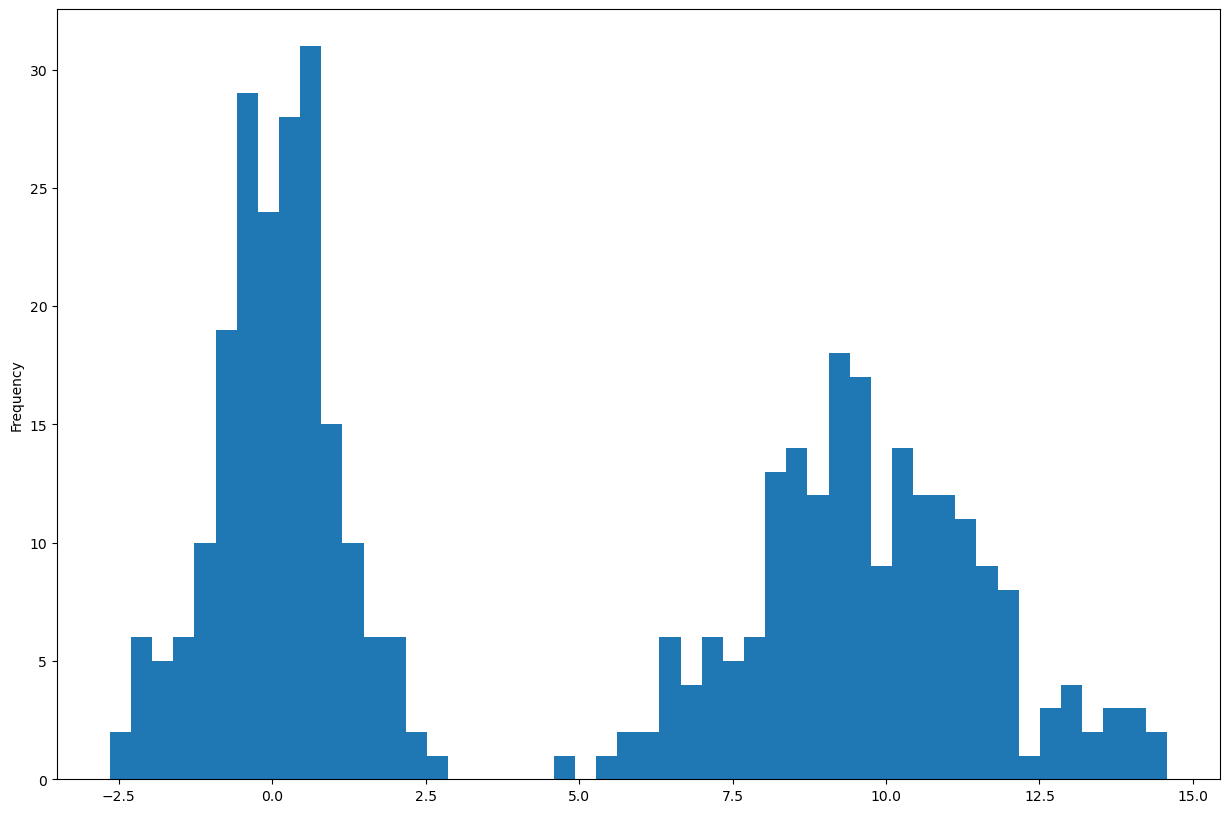

In [8]:
values.plot( kind="hist", bins=50, figsize=(15,10) )

A related plot type is a density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. A usual procedure is to approximate this distribution as a mixture of kernels , that is, simpler distributions like the normal (Gaussian) distribution. Thus, density plots are also known as KDE (kernel density estimate) plots. Using plot with kind='kde' makes a density plot using the standard mixture-of-normals KDE:

<Axes: ylabel='Density'>

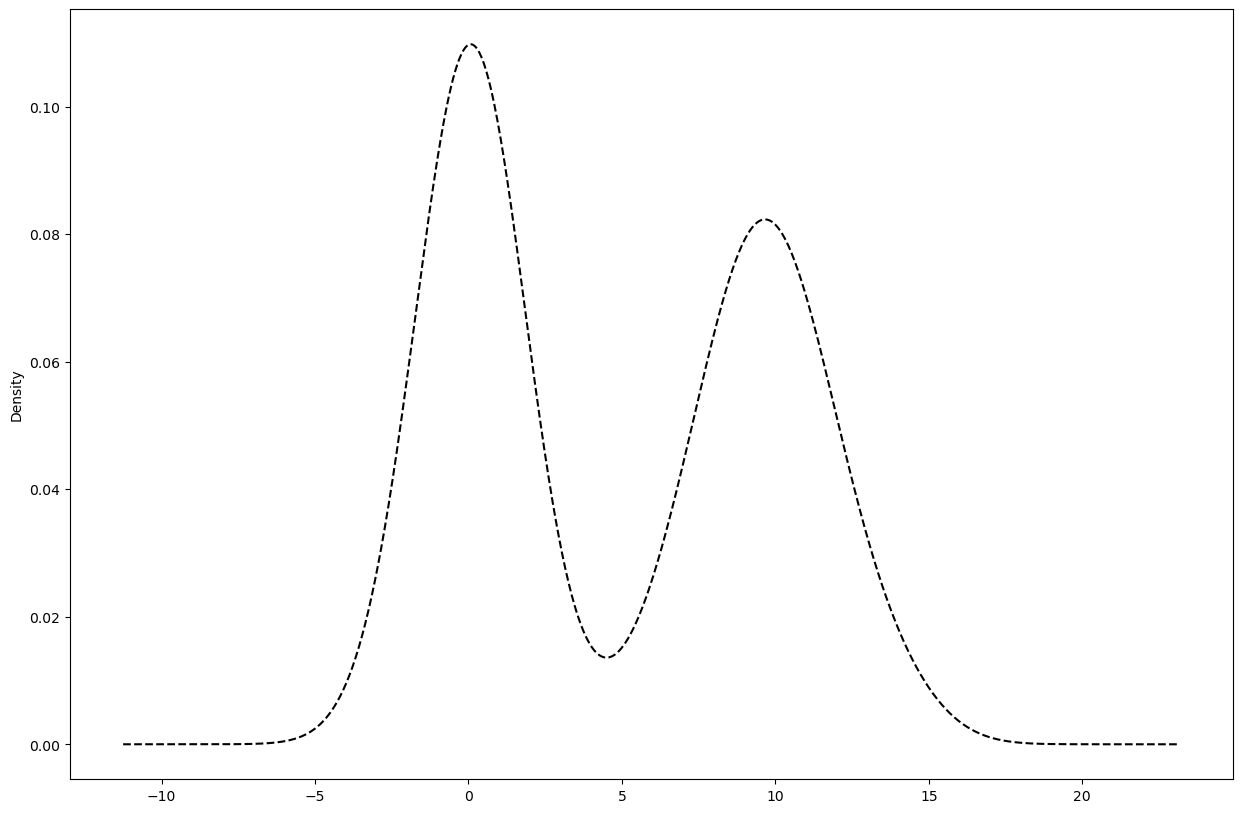

In [9]:
values.plot(kind='kde', style='k--', figsize=(15,10) )

These two plot types are often plotted together:

<Axes: ylabel='Density'>

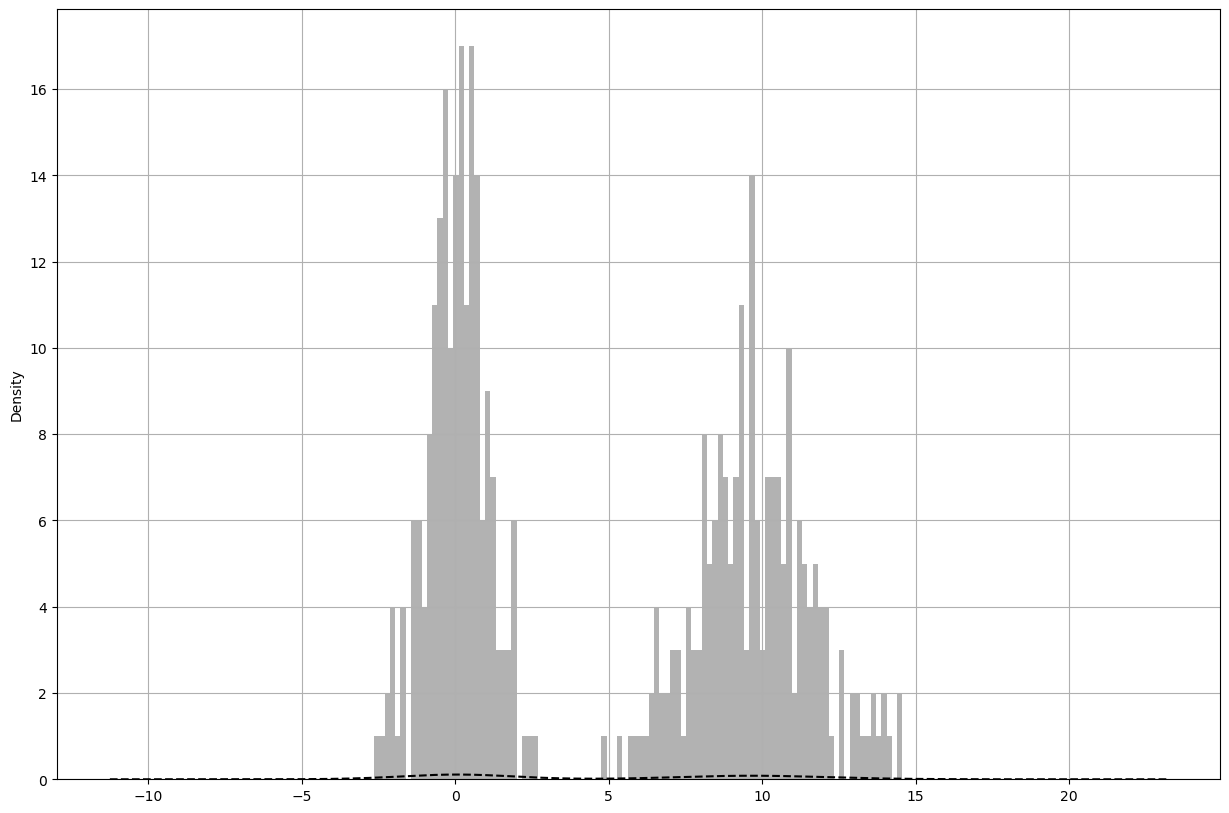

In [10]:
values.plot(kind='kde', style='k--', figsize=(15,10) )
values.hist(bins=100, alpha=0.3, color='k' )

## Scatter plots

Scatter plots are a useful way of examining the relationship between two one-dimensional data series. Let us load the macrodata dataset used in a previous example (GDB, inflation, unemployment) and select a few variables:

In [11]:
macro = pd.read_csv('Files-08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # Compute quarterly differences
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can create a scatter plot using $kind="scatter"$ and specifying which DataFrame columns should be used for the X and Y axes:

<Axes: title={'center': 'Changes in log(m1) vs. log(unemp)'}, xlabel='m1', ylabel='unemp'>

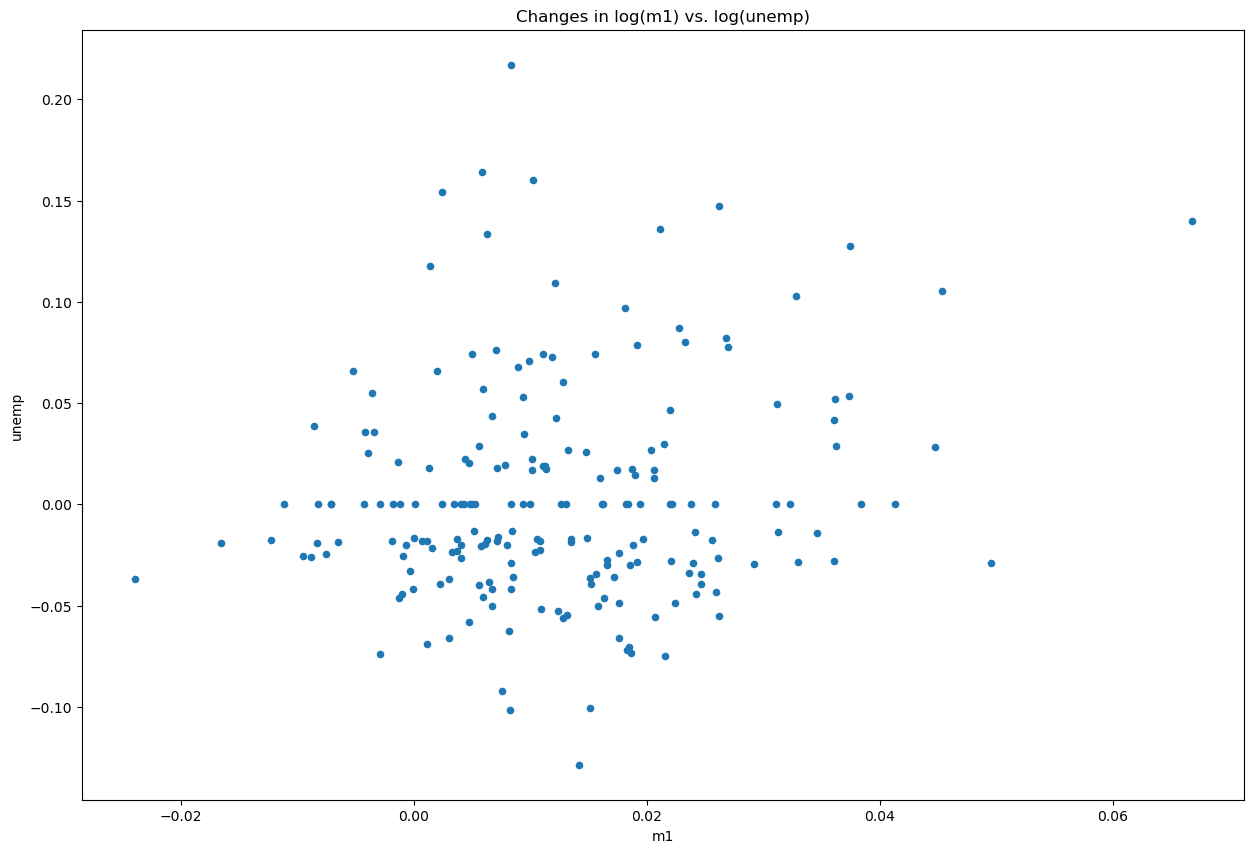

In [12]:
trans_data.plot( kind="scatter", x="m1", y="unemp", figsize=(15,10), title="Changes in log(m1) vs. log(unemp)" )

# Case study: plotting map data

Ushahidi is a non-profit software company that enables crowdsourcing of information related to natural disasters and geopolitical events via text message. These datasets can be accessed through their web API in JSON and CSV format. Let us load collected data during the 2010 Haiti earthquake from a CSV file:

In [13]:
data = pd.read_csv('Files-08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial          3593 non-null   int64  
 1   INCIDENT TITLE  3593 non-null   object 
 2   INCIDENT DATE   3593 non-null   object 
 3   LOCATION        3592 non-null   object 
 4   DESCRIPTION     3593 non-null   object 
 5   CATEGORY        3587 non-null   object 
 6   LATITUDE        3593 non-null   float64
 7   LONGITUDE       3593 non-null   float64
 8   APPROVED        3593 non-null   object 
 9   VERIFIED        3593 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


Each data row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp and a location as latitude and longitude:

In [14]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']].head()

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671


The CATEGORY field contains a comma-separated list of codes indicating the type of message:

In [15]:
data['CATEGORY'].head()

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
Name: CATEGORY, dtype: object

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, calling describe shows that there are some aberrant locations:

In [16]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


However, Haiti is located between 18-20 N latitude and 75-70 W longitude. We can drop all data points which do not fall inside this rectangle, as well as those without an associated category:

In [17]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3569 entries, 0 to 3592
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial          3569 non-null   int64  
 1   INCIDENT TITLE  3569 non-null   object 
 2   INCIDENT DATE   3569 non-null   object 
 3   LOCATION        3568 non-null   object 
 4   DESCRIPTION     3569 non-null   object 
 5   CATEGORY        3569 non-null   object 
 6   LATITUDE        3569 non-null   float64
 7   LONGITUDE       3569 non-null   float64
 8   APPROVED        3569 non-null   object 
 9   VERIFIED        3569 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 306.7+ KB


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, I wrote these two functions to get a list of all the categories and to split each category into a code and an English name:

In [18]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.') # Splits the string into code and names
    if '|' in names:
        names = names.split(' | ')[1] # Saves the name after the '|', which is the english version
    return code, names.strip()

An example of how get_english() works:

In [19]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

Now, we make a dict mapping code to name because we’ll use the codes for analysis. We’ll use this later when adorning plots:

In [20]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [21]:
english_mapping['6c']

'Earthquake and aftershocks'

Now let us build an indicator matrix to conveniently categorize the incidents:

In [22]:
all_codes = list(english_mapping.keys())
code_index = pd.Index(np.unique(all_codes))
code_index
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index, dtype=np.bool)
dummy_frame.head()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We initialize the values in the indicator matrix:

In [23]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1
dummy_frame.head()

/tmp/ipykernel_44821/991995613.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dummy_frame.loc[row, codes] = 1
/tmp/ipykernel_44821/991995613.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dummy_frame.loc[row, codes] = 1
/tmp/ipykernel_44821/991995613.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dummy_frame.loc[row, codes] = 1
/tmp/ipykernel_44821/991995613.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a 

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


And, lastly, we join both tables:

In [24]:
data = data.join(dummy_frame.add_prefix('category_'))
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,False,False,False,False,False,False,False,False,False,False
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,False,False,False,False,False,False,False,False,False,False
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,False,False,False,False,False,False,False,False,False,False
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,False,False,False,False,False,False,False,False,False,False
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,False,False,False,False,False,False,False,False,False,False


We are almost ready to build some plots. However, and since these data are geospatially referenced, it would be perfect if we could plot them on a map of Haiti. The $basemap$ toolkit, a Matplotlib add-on, allows to plot 2D maps in Python in a convenient way. It provides several different projections and methods to relate latitudes and longitudes with map points. The following function plots a 2D map of Haiti:

In [25]:
import geopandas
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='i')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

The basemap object returned by this function is capable of plotting on the canvas using geospatial coordinates, instead of X/Y coordinates. The following code plots data points for a set of categories:

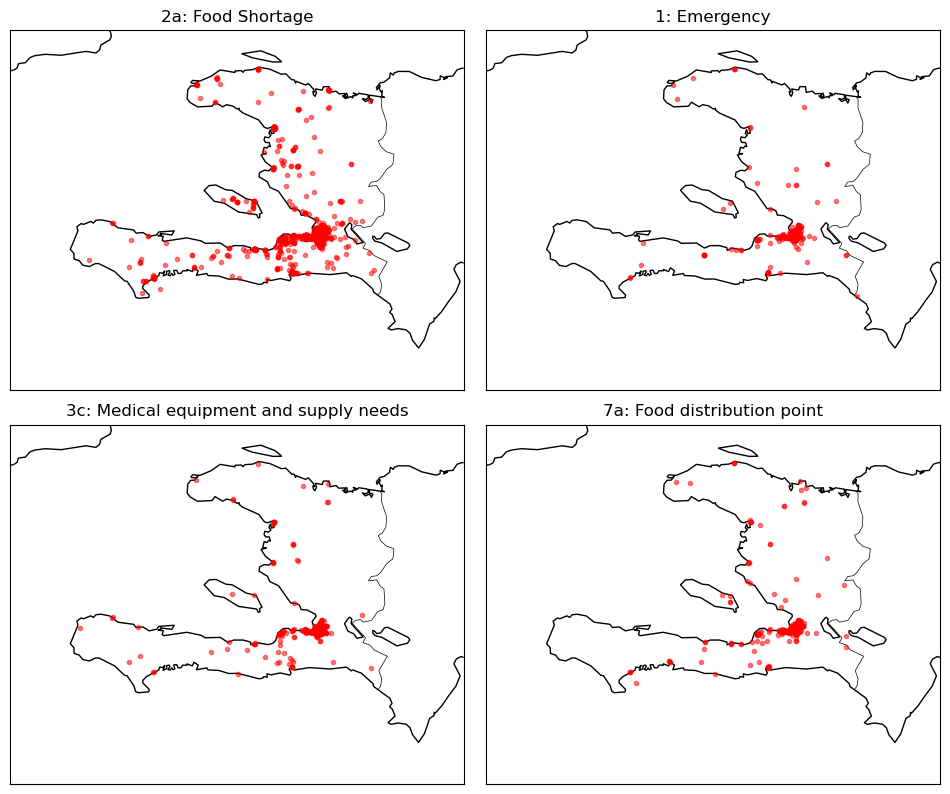

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'r.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

Looking at these maps, most incidents occurred nearby the capital, Port-au-Prince. basemap allows to overlap additional layers of information on basic maps, provided in *shapefiles*. We can download a shapefile containing Port-au-Prince roads and overlap it on the generated maps. The basemap class includes a reashapefile() method for this:

In [27]:
shapefile_path = 'Files-08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7c2ccf34c620>)

Looking at the data returned by readshapefile() we can infer the geographical limits of the roads and restrict our plot to these bounds:

In [28]:
code = '1'
cat_data = data[(data['category_%s' % code] == 1) &
                (data.LATITUDE >= lllat) &
                (data.LATITUDE <= urlat) &
                (data.LONGITUDE >= lllon) &
                (data.LONGITUDE <= urlon)]

Text(0.5, 1.0, '1: Emergency incidents restricted to Port-au-Prince region')

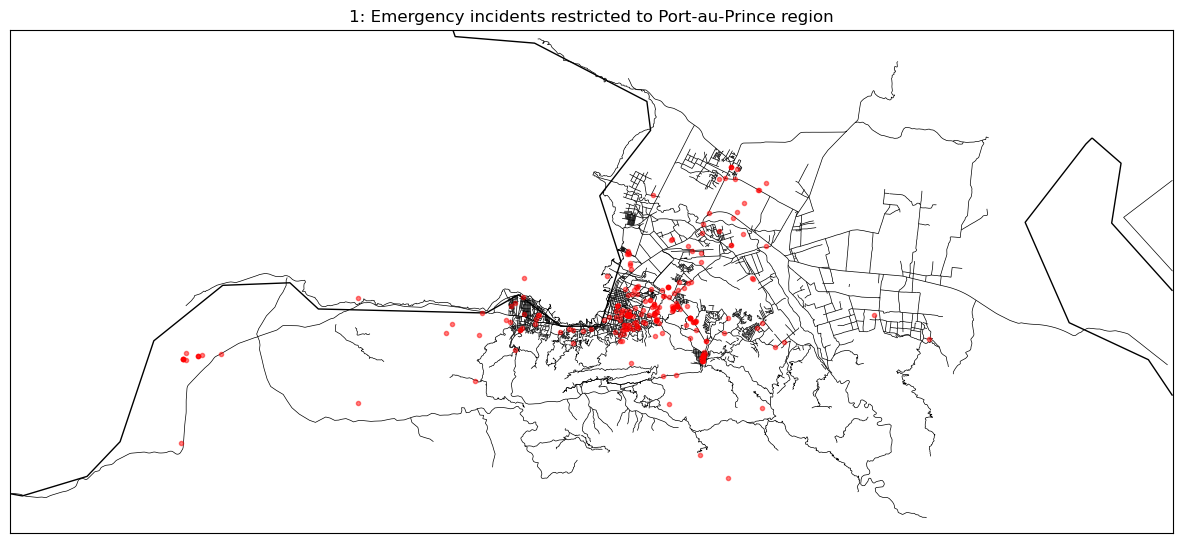

In [29]:
lllat=18.40; urlat=18.72; lllon=-72.75; urlon=-71.97;
fig, ax = plt.subplots( figsize=(15,10) )
m = basic_haiti_map( ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon )
m.readshapefile( shapefile_path, 'roads', drawbounds=True )

# compute map proj coordinates.
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

m.plot(x, y, 'r.', alpha=0.5)
ax.set_title('%s: %s incidents restricted to Port-au-Prince region' % (code, english_mapping[code]))